In [61]:
import os
import sys

sys.path.append('.')
sys.path.append('..')
import datetime as dt
import yaml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from src.data.dataset import ImageDataset
from src.data import imgproc
%matplotlib inline

imgproc = imgproc.get_proc_class('skimage')

os.chdir(os.path.dirname(globals()['_dh'][0]))
print(os.getcwd())

d:\Uni\Masters\ISSS610 Applied Machine Learning\Project\chexpert-aml


In [13]:
train_df = pd.read_csv('data/raw/CheXpert-v1.0-small/train.csv')
train_df

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,NaN,NaN,-1.0,1.0,NaN,-1.0,-1.0,NaN,-1.0,NaN,-1.0,NaN,1.0,NaN
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223409,CheXpert-v1.0-small/train/patient64537/study2/...,Male,59,Frontal,AP,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,-1.0,0.0,1.0,NaN,NaN,NaN
223410,CheXpert-v1.0-small/train/patient64537/study1/...,Male,59,Frontal,AP,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,0.0,-1.0,NaN,-1.0,NaN,NaN,NaN
223411,CheXpert-v1.0-small/train/patient64538/study1/...,Female,0,Frontal,AP,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223412,CheXpert-v1.0-small/train/patient64539/study1/...,Female,0,Frontal,AP,NaN,NaN,1.0,1.0,NaN,NaN,NaN,-1.0,1.0,0.0,NaN,NaN,NaN,0.0


In [58]:
train_df['Path'] = train_df['Path'].apply(lambda x: x.replace('CheXpert-v1.0-small', 'data/raw'))
train_df = train_df[train_df['Frontal/Lateral'] == 'Frontal']
train_df = train_df[train_df['No Finding'] != 1]
train_df.reset_index(drop=True, inplace=True)


In [34]:
train_df['Observation'] = train_df.iloc[:,6:].apply(lambda row: np.sum([x for x in row if x>0 ]), axis=1)
max(train_df['Observation'])

16.0

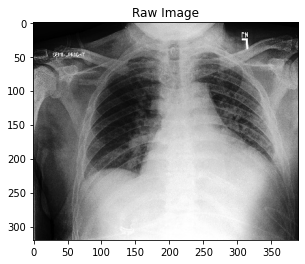

Path                          data/raw/train/patient00009/study1/view1_front...
Sex                                                                        Male
Age                                                                          76
Frontal/Lateral                                                         Frontal
AP/PA                                                                        PA
No Finding                                                                  NaN
Enlarged Cardiomediastinum                                                  NaN
Cardiomegaly                                                                1.0
Lung Opacity                                                                NaN
Lung Lesion                                                                 NaN
Edema                                                                       0.0
Consolidation                                                               NaN
Pneumonia                               

In [64]:
raw_img = imgproc.imread(train_df.loc[100,'Path'])
plt.imshow(raw_img, cmap=plt.cm.gray)
plt.title('Raw Image')
plt.show()
train_df.iloc[i, :]

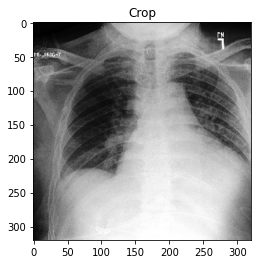

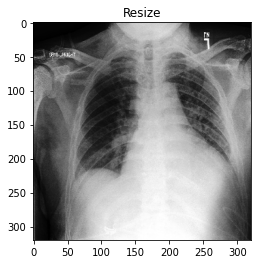

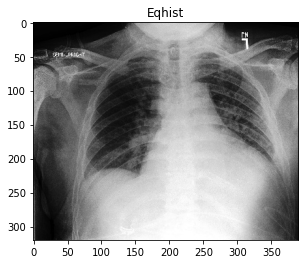

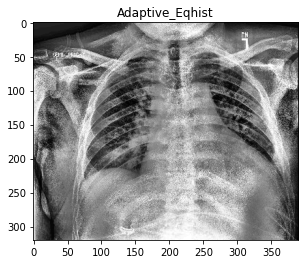

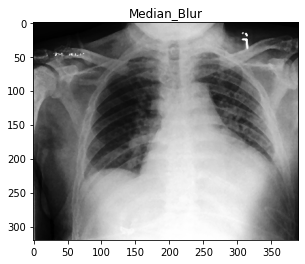

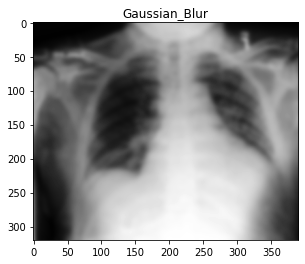

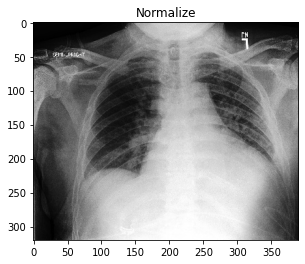

In [72]:
out_img_path = 'reports/image_preprocessing/'
if not os.path.exists(out_img_path):
    os.makedirs(out_img_path)
    
transformations = ['crop', 'resize', 'eqhist', 'adaptive_eqhist', 'median_blur', 'gaussian_blur', 'normalize']

for transformation in transformations:
    trans_args = [[transformation, {}]]
    transformed = imgproc.transform(raw_img, trans_args)
    plt.imshow(transformed, cmap=plt.cm.gray)
    plt.title(transformation.title())
    plt.savefig(os.path.join(out_img_path, transformation))
    plt.show()


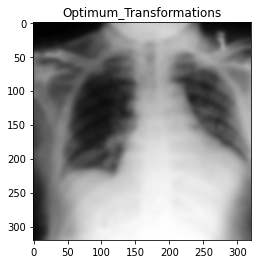

In [75]:
optimum_trans = [['crop', {'size': [320,320]}],
                    ['gaussian_blur',{}],
                    ['normalize', {}]]
       
transformed = imgproc.transform(raw_img, optimum_trans)
plt.imshow(transformed, cmap=plt.cm.gray)
plt.title('Optimum_Transformations')
plt.savefig(os.path.join(out_img_path, 'optimum_transformations'))
plt.show()